In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18
0,BMW 5 Series 520i Highline,Luxury Sedan,28-May-13,1yr 11mths 21days COE left),15920,N.A,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000,NaN
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800,NaN
2,MINI One 1.6A (New 10-yr COE),Hatchback,7-Oct-11,10yrs COE left),6280,110000,742,N.A,N.A,1598,1100,2011,Auto,18180,18180,72,3,62800,NaN
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,12-Feb-09,7yrs 8mths 5days COE left),N.A,N.A,959,N.A,25727,1591,1264,2009,Auto,10763,10763,89,3,N.A,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,28-Dec-07,1yr 6mths 21days COE left),8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          4411 non-null   object 
 1   Type           4411 non-null   object 
 2   Reg_date       4411 non-null   object 
 3   Coe_left       4389 non-null   object 
 4   Dep            4411 non-null   object 
 5   Mileage        4411 non-null   object 
 6   Road Tax       4411 non-null   object 
 7   Dereg Value    4411 non-null   object 
 8   COE            4411 non-null   object 
 9   Engine Cap     4411 non-null   object 
 10  Curb Weight    4411 non-null   object 
 11  Manufactured   4411 non-null   object 
 12  Transmission   4411 non-null   object 
 13  OMV            4411 non-null   object 
 14  ARF            4411 non-null   object 
 15  Power          4411 non-null   object 
 16  No. of Owners  4411 non-null   object 
 17  Price          4411 non-null   object 
 18  Unnamed:

In [6]:
data.columns

Index(['Brand', 'Type', 'Reg_date', 'Coe_left', 'Dep', 'Mileage', 'Road Tax',
       'Dereg Value', 'COE', 'Engine Cap', 'Curb Weight', 'Manufactured',
       'Transmission', 'OMV', 'ARF', 'Power', 'No. of Owners', 'Price',
       'Unnamed: 18'],
      dtype='object')

In [7]:
data.rename(columns = {'Brand':'brand', 'Type':'type', 'Reg_date':'reg_date', 'Coe_left':'coe_left', 'Dep':'dep', 'Mileage':'mileage', 'Road Tax':'road_tax',
       'Dereg Value':'dereg_value', 'COE':'coe', 'Engine Cap':'engine_cap', 'Curb Weight':
                       'curb_weight', 'Manufactured':'manufactured',
       'Transmission':'transm', 'OMV':'omv', 'ARF':'arf', 'Power':'pwr', 'No. of Owners':'n_owners', 'Price':'price'}, inplace = True)

In [8]:
data.columns

Index(['brand', 'type', 'reg_date', 'coe_left', 'dep', 'mileage', 'road_tax',
       'dereg_value', 'coe', 'engine_cap', 'curb_weight', 'manufactured',
       'transm', 'omv', 'arf', 'pwr', 'n_owners', 'price', 'Unnamed: 18'],
      dtype='object')

In [9]:
data.loc[~data['Unnamed: 18'].isnull(), 'price'] = data.loc[~data['Unnamed: 18'].isnull(), 'Unnamed: 18']
data.loc[~data['Unnamed: 18'].isnull()]

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price,Unnamed: 18
23,MINI John Cooper Works GP 2.0A,Sports Car,4-Aug-20,9yrs 1mth 28days COE left),N.A.,20,1210,N.A,N.A,1998,N.A,N.A,$50,403,N.A,N.A,N.A,199900.0,199900.0
485,E-Class E200 Avantgarde,Luxury Sedan,N.A.,NaN,N.A.,16507,1202,N.A,10,1991,N.A,N.A,$27,600,N.A,N.A,N.A,195000.0,195000.0
605,GLB-Class GLB250 AMG Line,SUV,N.A.,NaN,N.A.,23,1202,N.A,10,1991,N.A,N.A,$40,0,N.A,N.A,N.A,225800.0,225800.0
927,Phantom,Luxury Sedan,N.A.,NaN,N.A.,50,8250,N.A,10,6749,N.A,N.A,$370,439,1,N.A,N.A,1690000.0,1690000.0
1034,S-Class S560 Coupe AMG Line,Sports Car,N.A.,NaN,N.A.,N.A,3922,N.A,10,3982,N.A,N.A,$143,0,N.A,N.A,N.A,518800.0,518800.0
1044,Alphard 2.5A SC Moonroof,MPV,N.A.,NaN,N.A.,50,1792,N.A,10,2493,N.A,N.A,$49,428,1,N.A,N.A,240888.0,240888.0
1052,Cullinan 6.75A,SUV,N.A.,NaN,N.A.,N.A,8250,N.A,10,6749,N.A,N.A,$200,0,N.A,N.A,N.A,1580000.0,1580000.0
1236,4 Series 420i Gran Coupe M-Sport,Luxury Sedan,N.A.,NaN,N.A.,N.A,1210,N.A,10,1998,N.A,N.A,$20,0,N.A,N.A,N.A,155800.0,155800.0
1349,3 Series 330i M-Sport,Luxury Sedan,N.A.,NaN,N.A.,4170,1210,N.A,10,1998,N.A,N.A,$34,0,190,N.A,N.A,206800.0,206800.0
1565,M Series M4 Convertible Competition Package,Sports Car,N.A.,NaN,N.A.,N.A,2362,N.A,10,2979,N.A,N.A,$43,0,331,N.A,N.A,298888.0,298888.0


In [10]:
data.loc[~data['coe_left'].isnull()]

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price,Unnamed: 18
0,BMW 5 Series 520i Highline,Luxury Sedan,28-May-13,1yr 11mths 21days COE left),15920,N.A,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000,NaN
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800,NaN
2,MINI One 1.6A (New 10-yr COE),Hatchback,7-Oct-11,10yrs COE left),6280,110000,742,N.A,N.A,1598,1100,2011,Auto,18180,18180,72,3,62800,NaN
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,12-Feb-09,7yrs 8mths 5days COE left),N.A,N.A,959,N.A,25727,1591,1264,2009,Auto,10763,10763,89,3,N.A,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,28-Dec-07,1yr 6mths 21days COE left),8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,Mercedes-Benz C-Class C180,Luxury Sedan,20-Dec-13,2yrs 6mths 13days COE left),15240,127000,740,35772,73989,1595,1485,2013,Auto,29525,28335,115,4,52828,NaN
4407,Mazda 3 1.5A Sunroof,Mid-Sized Sedan,7-Dec-17,6yrs 6mths COE left),9340,40200,682,35419,42801,1496,1310,2017,Auto,15108,10108,88,3,65800,NaN
4408,Toyota Hiace 2.5A (COE till 02/2022),Bus/Mini Bus,8-Feb-07,8mths 1day COE left),26410,N.A,N.A,3269,24252,2494,1800,2006,Auto,N.A,27970,6,N.A,17800,NaN
4409,Subaru Forester 2.0i-L Sunroof,SUV,29-Jul-15,4yrs 1mth 22days COE left),10590,120000,1208,39265,74501,1995,1566,2015,Auto,13772,13772,110,1,50800,NaN


In [11]:
data = data.drop("Unnamed: 18",axis = 1)

In [12]:
data.isna().sum()

brand            0
type             0
reg_date         0
coe_left        22
dep              0
mileage          0
road_tax         0
dereg_value      0
coe              0
engine_cap       0
curb_weight      0
manufactured     0
transm           0
omv              0
arf              0
pwr              0
n_owners         0
price            0
dtype: int64

In [13]:
data['type'].astype(str).eq('N.A').sum()

0

In [14]:
print(data['reg_date'].astype(str).eq('N.A.').sum())
data.reg_date[data.reg_date=='N.A.']=np.nan

20


In [15]:
data['coe_left'].astype(str).eq('N.A').sum()

0

In [16]:
print(data['dep'].astype(str).eq('N.A').sum())
data.dep[data.dep == 'N.A'] = np.nan
data.dep[data.dep == 'N.A.'] = np.nan

708


In [17]:
print(data['mileage'].astype(str).eq('N.A').sum())
data.mileage[data.mileage =='N.A'] = np.nan

1560


In [18]:
print(data['road_tax'].astype(str).eq('N.A').sum())
data.road_tax[data.road_tax=='N.A'] = np.nan

428


In [19]:
print(data['dereg_value'].astype(str).eq('N.A').sum())
data.dereg_value[data.dereg_value=='N.A']=np.nan

965


In [20]:
print(data['coe'].astype(str).eq('N.A').sum())
data.coe[data.coe=='N.A']=np.nan

259


In [21]:
print(data['engine_cap'].astype(str).eq('N.A').sum())
data.engine_cap[data.engine_cap=='N.A']=np.nan

3


In [22]:
print(data['curb_weight'].astype(str).eq('N.A').sum())
data.curb_weight[data.curb_weight=='N.A']=np.nan

80


In [23]:
print(data['manufactured'].astype(str).eq('N.A').sum())
data.manufactured[data.manufactured=='N.A']=np.nan

20


In [24]:
data['transm'].astype(str).eq('N.A').sum()

0

In [25]:
print(data['omv'].astype(str).eq('N.A').sum())
data.omv[data.omv=='N.A']=np.nan

418


In [26]:
print(data['pwr'].astype(str).eq('N.A').sum())
data.pwr[data.pwr=='N.A']=np.nan

23


In [27]:
print(data['n_owners'].astype(str).eq('N.A').sum())
data.n_owners[data.n_owners=='N.A']=np.nan

72


In [28]:
print(data['arf'].astype(str).eq('N.A').sum())
data.arf[data.arf=='N.A']=np.nan

13


In [29]:
print(data['price'].astype(str).eq('N.A').sum())
data.price[data.price=='N.A']=np.nan
data.price[data.price=='N.A.']=np.nan

720


In [30]:
data.isna().sum()

brand              0
type               0
reg_date          20
coe_left          22
dep              786
mileage         1560
road_tax         428
dereg_value      965
coe              259
engine_cap         3
curb_weight       80
manufactured      20
transm             0
omv              418
arf               13
pwr               23
n_owners          72
price            720
dtype: int64

<AxesSubplot:>

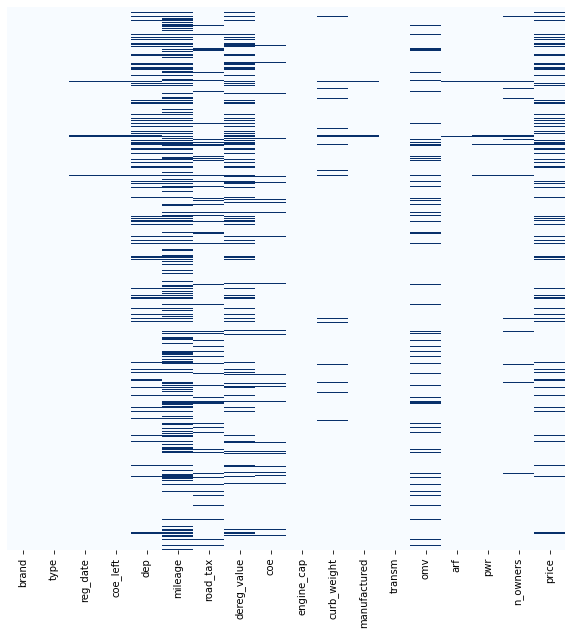

In [31]:
plt.figure(figsize=(10,10))
call=data.columns
sns.heatmap(data[call].isnull(),cmap='Blues',yticklabels=False,cbar=False)

<AxesSubplot:>

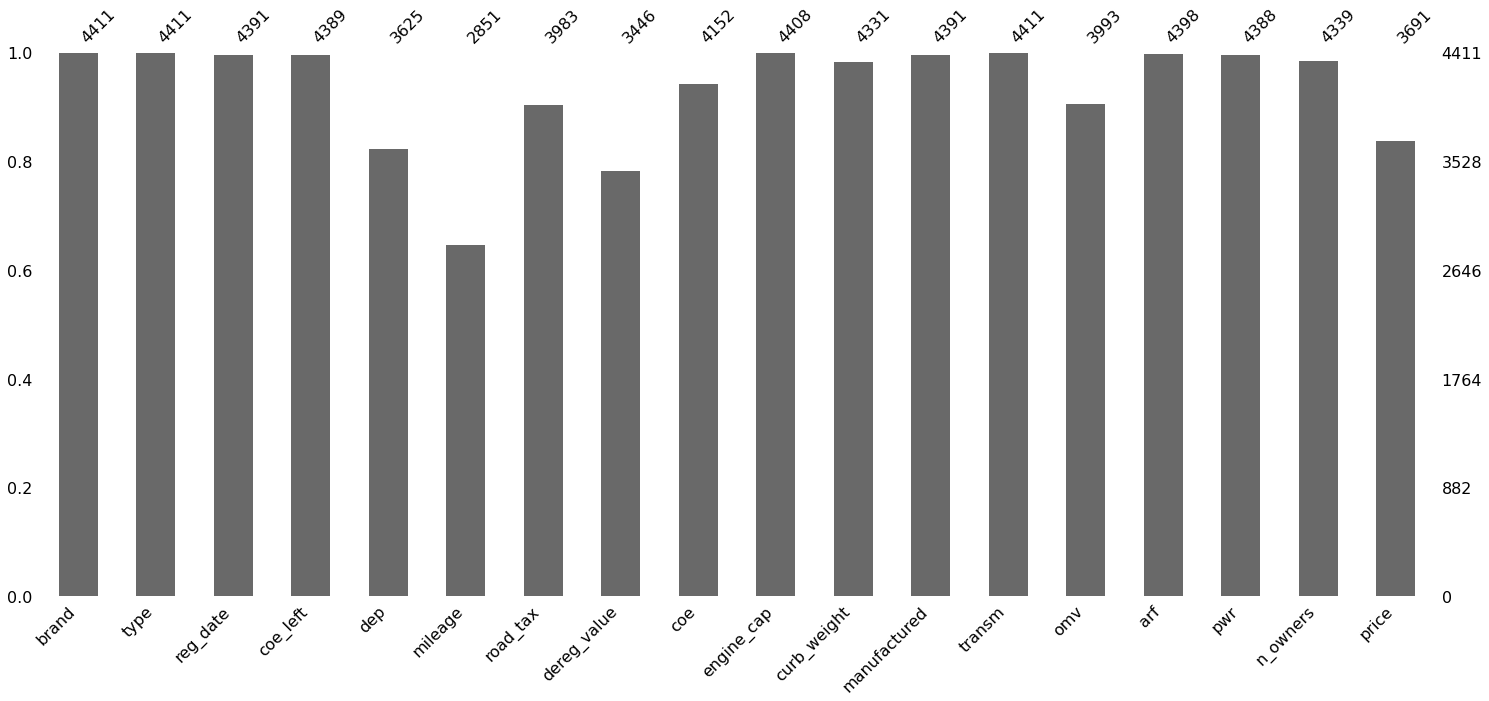

In [32]:
import missingno as msno
msno.bar(data)

In [33]:
data = data.drop_duplicates()

In [34]:
#data[['yrs','mnths','days','coe_text']] = data.coe_left.str.split(" ",3,expand=True,)

In [35]:
#data=data.drop('coe_text',axis =1)

In [36]:
def cast_list(test_list, data_type):
    return list(map(data_type, test_list))


In [37]:
def coe_months(text):
    #test_string=('7yrs 8mths 5days COE left)')
    if type(text) is str:
        if 'yr' in text:
            if 'mth' in text:
                if 'day' in text:
                    text =text.removesuffix(' COE left)')
                    numbers=re.split('yrs|yr|mths|mth|days|day| ',text)
                    while '' in numbers:
                        numbers.remove('')
                    numbers=cast_list(numbers,int)
                    months=round(numbers[0]*12+numbers[1]+numbers[2]/30,2)
                elif 'day' not in text:
                    text =text.removesuffix(' COE left)')
                    numbers=re.split('yrs|yr|mths|mth| ',text)
                    while '' in numbers:
                        numbers.remove('')
                    numbers=cast_list(numbers,int)
                    months=round(numbers[0]*12+numbers[1],2)
            elif 'mth' not in text:
                if 'day' in text:
                    text =text.removesuffix(' COE left)')
                    numbers=re.split('yrs|yr|days|day| ',text)
                    while '' in numbers:
                        numbers.remove('')
                    numbers=cast_list(numbers,int)
                    months=round(numbers[0]*12+numbers[1]/30,2) 
                elif 'day' not in text:
                    text =text.removesuffix(' COE left)')
                    numbers=re.split('yrs|yr| ',text)
                    while '' in numbers:
                        numbers.remove('')
                    numbers=cast_list(numbers,int)
                    months=numbers[0]*12
        elif 'yr' not in text:
            if 'mth' in text:
                    if 'day' in text:
                        text =text.removesuffix(' COE left)')
                        numbers=re.split('mths|mth|days|day| ',text)
                        while '' in numbers:
                            numbers.remove('')
                        numbers=cast_list(numbers,int)
                        months=round(numbers[0]+numbers[1]/30,2)
                    elif 'day' not in text:
                        text =text.removesuffix(' COE left)')
                        numbers=re.split('mths|mth| ',text)
                        while '' in numbers:
                            numbers.remove('')
                        numbers=cast_list(numbers,int)
                        months=round(numbers[0],2)
            elif 'mth' not in text:
                    if 'day' in text:
                        text =text.removesuffix(' COE left)')
                        numbers=re.split('days|day| ',text)
                        while '' in numbers:
                            numbers.remove('')
                        numbers=cast_list(numbers,int)
                        months=round(numbers[0]/30,2) 
        return months
                        
                

In [38]:
data.coe_left = data.coe_left.apply(lambda x:coe_months(x))
data

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price
0,BMW 5 Series 520i Highline,Luxury Sedan,28-May-13,23.70,15920,NaN,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,52.23,10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800
2,MINI One 1.6A (New 10-yr COE),Hatchback,7-Oct-11,120.00,6280,110000,742,NaN,NaN,1598,1100,2011,Auto,18180,18180,72,3,62800
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,12-Feb-09,92.17,NaN,NaN,959,NaN,25727,1591,1264,2009,Auto,10763,10763,89,3,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,28-Dec-07,18.70,8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,Mercedes-Benz C-Class C180,Luxury Sedan,20-Dec-13,30.43,15240,127000,740,35772,73989,1595,1485,2013,Auto,29525,28335,115,4,52828
4407,Mazda 3 1.5A Sunroof,Mid-Sized Sedan,7-Dec-17,78.00,9340,40200,682,35419,42801,1496,1310,2017,Auto,15108,10108,88,3,65800
4408,Toyota Hiace 2.5A (COE till 02/2022),Bus/Mini Bus,8-Feb-07,8.03,26410,NaN,NaN,3269,24252,2494,1800,2006,Auto,NaN,27970,6,NaN,17800
4409,Subaru Forester 2.0i-L Sunroof,SUV,29-Jul-15,49.73,10590,120000,1208,39265,74501,1995,1566,2015,Auto,13772,13772,110,1,50800


In [39]:
data['reg_date'] = data['reg_date'].str.replace('Jan','01')
data['reg_date'] = data['reg_date'].str.replace('Feb','02')
data['reg_date'] = data['reg_date'].str.replace('Mar','03')
data['reg_date'] = data['reg_date'].str.replace('Apr','04')
data['reg_date'] = data['reg_date'].str.replace('May','05')
data['reg_date'] = data['reg_date'].str.replace('Jun','06')
data['reg_date'] = data['reg_date'].str.replace('Jul','07')
data['reg_date'] = data['reg_date'].str.replace('Aug','08')
data['reg_date'] = data['reg_date'].str.replace('Sep','09')
data['reg_date'] = data['reg_date'].str.replace('Oct','10')
data['reg_date'] = data['reg_date'].str.replace('Nov','11')
data['reg_date'] = data['reg_date'].str.replace('Dec','12')
#strftime("%b-%d-%Y")/strftime("%B-%d-%y") --------------------prea tarziu am gasit asta

In [40]:

def convert_date(date):
    if type(date) is str:
        rd=re.split('-',date)
        if int(rd[2]) < 23 and int(rd[2]) >=0 :
            rd[2]='20'+rd[2]
#         elif int(rd[2]) <10 and int(rd[2])>=0:
#             rd[2]='200'+rd[2]
        else:
            rd[2]='19'+rd[2]
        str_date=f'{rd[2]}/{rd[1]}/{rd[0]}'
        return str_date

In [41]:
data['reg_date'] = data['reg_date'].apply(lambda x:convert_date(x))
data

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price
0,BMW 5 Series 520i Highline,Luxury Sedan,2013/05/28,23.70,15920,NaN,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000
1,Honda Vezel 1.5A X Honda Sensing,SUV,2015/10/14,52.23,10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800
2,MINI One 1.6A (New 10-yr COE),Hatchback,2011/10/7,120.00,6280,110000,742,NaN,NaN,1598,1100,2011,Auto,18180,18180,72,3,62800
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,2009/02/12,92.17,NaN,NaN,959,NaN,25727,1591,1264,2009,Auto,10763,10763,89,3,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,2007/12/28,18.70,8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,Mercedes-Benz C-Class C180,Luxury Sedan,2013/12/20,30.43,15240,127000,740,35772,73989,1595,1485,2013,Auto,29525,28335,115,4,52828
4407,Mazda 3 1.5A Sunroof,Mid-Sized Sedan,2017/12/7,78.00,9340,40200,682,35419,42801,1496,1310,2017,Auto,15108,10108,88,3,65800
4408,Toyota Hiace 2.5A (COE till 02/2022),Bus/Mini Bus,2007/02/8,8.03,26410,NaN,NaN,3269,24252,2494,1800,2006,Auto,NaN,27970,6,NaN,17800
4409,Subaru Forester 2.0i-L Sunroof,SUV,2015/07/29,49.73,10590,120000,1208,39265,74501,1995,1566,2015,Auto,13772,13772,110,1,50800


In [42]:
data['reg_date'] = pd.to_datetime(data['reg_date']).dt.date

In [43]:
from datetime import date
from datetime import datetime
#date='2012/04/25'
def date_diff(date):
    today = date.today()
    #d2=data.reg_date[1]
    diff=round(abs((date - today).days)/30,2)
    return diff

In [44]:
data['reg_date'] = data['reg_date'].apply(lambda x:date_diff(x))
data

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price
0,BMW 5 Series 520i Highline,Luxury Sedan,116.77,23.70,15920,NaN,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000
1,Honda Vezel 1.5A X Honda Sensing,SUV,87.80,52.23,10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800
2,MINI One 1.6A (New 10-yr COE),Hatchback,136.73,120.00,6280,110000,742,NaN,NaN,1598,1100,2011,Auto,18180,18180,72,3,62800
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,168.97,92.17,NaN,NaN,959,NaN,25727,1591,1264,2009,Auto,10763,10763,89,3,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,182.70,18.70,8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,Mercedes-Benz C-Class C180,Luxury Sedan,109.90,30.43,15240,127000,740,35772,73989,1595,1485,2013,Auto,29525,28335,115,4,52828
4407,Mazda 3 1.5A Sunroof,Mid-Sized Sedan,61.63,78.00,9340,40200,682,35419,42801,1496,1310,2017,Auto,15108,10108,88,3,65800
4408,Toyota Hiace 2.5A (COE till 02/2022),Bus/Mini Bus,193.47,8.03,26410,NaN,NaN,3269,24252,2494,1800,2006,Auto,NaN,27970,6,NaN,17800
4409,Subaru Forester 2.0i-L Sunroof,SUV,90.37,49.73,10590,120000,1208,39265,74501,1995,1566,2015,Auto,13772,13772,110,1,50800


In [45]:
data.isnull().sum()

brand              0
type               0
reg_date          20
coe_left          22
dep              772
mileage         1545
road_tax         426
dereg_value      951
coe              259
engine_cap         3
curb_weight       79
manufactured      20
transm             0
omv              417
arf               13
pwr               23
n_owners          71
price            706
dtype: int64

In [46]:
data.head()

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price
0,BMW 5 Series 520i Highline,Luxury Sedan,116.77,23.70,15920,NaN,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000
1,Honda Vezel 1.5A X Honda Sensing,SUV,87.80,52.23,10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800
2,MINI One 1.6A (New 10-yr COE),Hatchback,136.73,120.00,6280,110000,742,NaN,NaN,1598,1100,2011,Auto,18180,18180,72,3,62800
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,168.97,92.17,NaN,NaN,959,NaN,25727,1591,1264,2009,Auto,10763,10763,89,3,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,182.70,18.70,8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800


In [47]:
data.isnull().sum()

brand              0
type               0
reg_date          20
coe_left          22
dep              772
mileage         1545
road_tax         426
dereg_value      951
coe              259
engine_cap         3
curb_weight       79
manufactured      20
transm             0
omv              417
arf               13
pwr               23
n_owners          71
price            706
dtype: int64

In [48]:
data=data. replace(np. nan,'999999')

In [49]:
data.columns

Index(['brand', 'type', 'reg_date', 'coe_left', 'dep', 'mileage', 'road_tax',
       'dereg_value', 'coe', 'engine_cap', 'curb_weight', 'manufactured',
       'transm', 'omv', 'arf', 'pwr', 'n_owners', 'price'],
      dtype='object')

In [50]:
data['reg_date'] = data['reg_date'].astype('float')
data['coe_left'] = data['dep'].astype('float')
data['dep'] = data['dep'].astype('float')
data['mileage'] = data['mileage'].astype('float')
data['road_tax'] = data['road_tax'].astype('float')
data['dereg_value'] = data['dereg_value'].astype('float')
data['coe'] = data['coe'].astype('float')
data['engine_cap'] = data['engine_cap'].astype('int')
data['curb_weight'] = data['curb_weight'].astype('int')
data['manufactured'] = data['manufactured'].astype('int')
data['omv'] = data['omv'].astype('int')
data['arf'] = data['arf'].astype('int')
data['pwr'] = data['pwr'].astype('int')
data['n_owners'] = data['n_owners'].astype('int')
data['price'] = data['price'].astype('int')

In [51]:
data=data. replace(int('999999'),np.nan)

In [52]:
data.isna().sum()

brand              0
type               0
reg_date          20
coe_left         772
dep              772
mileage         1545
road_tax         426
dereg_value      951
coe              259
engine_cap         3
curb_weight       79
manufactured      20
transm             0
omv              417
arf               13
pwr               23
n_owners          71
price            706
dtype: int64

In [53]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm')

In [54]:
data.brand.value_counts()

Honda Vezel 1.5A X                             57
Mercedes-Benz C-Class C180 Avantgarde          55
Nissan NV200 1.6A DX                           35
Honda Civic 1.6A VTi                           33
Toyota Corolla Altis 1.6A Elegance             31
                                               ..
Toyota Fortuner 2.7A                            1
Toyota Vios 1.5A J (COE till 05/2022)           1
Suzuki Swift Sport 1.6M (COE till 05/2021)      1
Honda Accord Euro R 2.0M (COE till 09/2027)     1
Toyota Hiace 2.5A (COE till 02/2022)            1
Name: brand, Length: 2159, dtype: int64

### 2150 de valori unice,mi se par ca sunt prea multe,luand in consideratie ca nu avem nevoie de capacitatea motorului din nume,deoarece avem coloana aparte,plus alte date care ne-ar ajuta intuitiv sa gasim modelul

In [55]:
def brand_reducer(text):
    #text='Toyota Hiace 2.5A (COE till 02/2022)'
    if type(text) is str:
        words=re.split(' ',text)
#         if len(words)>2:
#             brand = f'{words[0]} {words[1]}'
#         else:
        brand=words[0]
    return brand

In [56]:
brand_reducer('Toyota Hiace 2.5A (COE till 02/2022)')

'Toyota'

In [57]:
data['brand'] = data['brand'].apply(lambda x:brand_reducer(x))
data

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price
0,BMW,Luxury Sedan,116.77,15920.0,15920.0,NaN,1210.0,38133.0,67304.0,1997.0,1610.0,2013.0,Auto,41566.0,45193.0,135.0,1.0,54000.0
1,Honda,SUV,87.80,10310.0,10310.0,50000.0,682.0,31237.0,56001.0,1496.0,1190.0,2015.0,Auto,19775.0,9775.0,96.0,2.0,49800.0
2,MINI,Hatchback,136.73,6280.0,6280.0,110000.0,742.0,NaN,NaN,1598.0,1100.0,2011.0,Auto,18180.0,18180.0,72.0,3.0,62800.0
3,Hyundai,Mid-Sized Sedan,168.97,NaN,NaN,NaN,959.0,NaN,25727.0,1591.0,1264.0,2009.0,Auto,10763.0,10763.0,89.0,3.0,NaN
4,Suzuki,Hatchback,182.70,8210.0,8210.0,203000.0,1030.0,6656.0,21349.0,1586.0,1060.0,2007.0,Manual,12154.0,13370.0,92.0,2.0,12800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,Mercedes-Benz,Luxury Sedan,109.90,15240.0,15240.0,127000.0,740.0,35772.0,73989.0,1595.0,1485.0,2013.0,Auto,29525.0,28335.0,115.0,4.0,52828.0
4407,Mazda,Mid-Sized Sedan,61.63,9340.0,9340.0,40200.0,682.0,35419.0,42801.0,1496.0,1310.0,2017.0,Auto,15108.0,10108.0,88.0,3.0,65800.0
4408,Toyota,Bus/Mini Bus,193.47,26410.0,26410.0,NaN,NaN,3269.0,24252.0,2494.0,1800.0,2006.0,Auto,NaN,27970.0,6.0,NaN,17800.0
4409,Subaru,SUV,90.37,10590.0,10590.0,120000.0,1208.0,39265.0,74501.0,1995.0,1566.0,2015.0,Auto,13772.0,13772.0,110.0,1.0,50800.0


In [58]:
data.brand.value_counts()

Toyota           750
Mercedes-Benz    634
Honda            561
BMW              406
Nissan           291
                ... 
Phantom            1
C-Class            1
Lotus              1
GLB-Class          1
Vezel              1
Name: brand, Length: 69, dtype: int64

### 69 este mai bine decat 2150

In [59]:
# import category_encoders as ce
# encoder = ce.BinaryEncoder(cols=['brand'])
# databin = encoder.fit_transform(data['brand'])
# data_bin=pd.concat([data,databin],axis=1)
# encoder = ce.BinaryEncoder(cols=['type'])
# databin = encoder.fit_transform(data['type'])
# data_bin=pd.concat([data_bin,databin],axis=1)
# data_bin

In [60]:
# plt.figure(figsize=(20,20))
# sns.heatmap(data_bin.corr(),annot = True,cmap = 'coolwarm')

In [61]:
# fe=data.groupby('brand').size()/len(data)
# data.loc[:, 'brand_freq_encode'] = data['brand'].map(fe)
# data

In [62]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm')

In [63]:
data.type.value_counts()

Luxury Sedan       881
Mid-Sized Sedan    856
SUV                785
Hatchback          465
Sports Car         459
MPV                447
Van                232
Truck              148
Stationwagon        90
Bus/Mini Bus        31
Others               2
Name: type, dtype: int64

In [64]:
# fe=data.groupby('type').size()/len(data)
# data.loc[:, 'type_freq_encode'] = data['type'].map(fe)
# data

In [177]:
from sklearn.preprocessing import LabelEncoder
lbl_enc=LabelEncoder()
for column in data

In [178]:
data.head()

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price
0,9,2,116.77,15920.0,15920.0,NaN,1210.0,38133.0,67304.0,1997.0,1610.0,2013.0,14,41566.0,45193.0,135.0,1.0,54000.0
1,25,6,87.80,10310.0,10310.0,50000.0,682.0,31237.0,56001.0,1496.0,1190.0,2015.0,14,19775.0,9775.0,96.0,2.0,49800.0
2,39,1,136.73,6280.0,6280.0,110000.0,742.0,NaN,NaN,1598.0,1100.0,2011.0,14,18180.0,18180.0,72.0,3.0,62800.0
3,27,4,168.97,NaN,NaN,NaN,959.0,NaN,25727.0,1591.0,1264.0,2009.0,14,10763.0,10763.0,89.0,3.0,NaN
4,62,1,182.70,8210.0,8210.0,203000.0,1030.0,6656.0,21349.0,1586.0,1060.0,2007.0,16,12154.0,13370.0,92.0,2.0,12800.0


In [168]:
data.isnull().sum()

brand              0
type               0
reg_date          20
coe_left         772
dep              772
mileage         1545
road_tax         426
dereg_value      951
coe              259
engine_cap         3
curb_weight       79
manufactured      20
transm             0
omv              417
arf               13
pwr               23
n_owners          71
price            706
dtype: int64

In [169]:
x=data.drop('price',axis=1)
y=data.loc[:,'price']

In [170]:
lr=LinearRegression()
imp=IterativeImputer(estimator=lr,verbose=2,max_iter=150,tol=1e-3,imputation_order='roman')

In [171]:
imp.fit(x)
x_imp=imp.transform(x)

[IterativeImputer] Completing matrix with shape (4396, 17)
[IterativeImputer] Ending imputation round 1/150, elapsed time 0.05
[IterativeImputer] Change: 5738781.448951742, scaled tolerance: 858.23 
[IterativeImputer] Ending imputation round 2/150, elapsed time 0.10
[IterativeImputer] Change: 2152092.4646025943, scaled tolerance: 858.23 
[IterativeImputer] Ending imputation round 3/150, elapsed time 0.14
[IterativeImputer] Change: 724164.0624521531, scaled tolerance: 858.23 
[IterativeImputer] Ending imputation round 4/150, elapsed time 0.18
[IterativeImputer] Change: 173354.68776662537, scaled tolerance: 858.23 
[IterativeImputer] Ending imputation round 5/150, elapsed time 0.23
[IterativeImputer] Change: 59468.77907432758, scaled tolerance: 858.23 
[IterativeImputer] Ending imputation round 6/150, elapsed time 0.28
[IterativeImputer] Change: 135296.19189545783, scaled tolerance: 858.23 
[IterativeImputer] Ending imputation round 7/150, elapsed time 0.32
[IterativeImputer] Change: 153

[IterativeImputer] Change: 7820.678703310068, scaled tolerance: 858.23 
[IterativeImputer] Ending imputation round 61/150, elapsed time 2.87
[IterativeImputer] Change: 7569.656110918089, scaled tolerance: 858.23 
[IterativeImputer] Ending imputation round 62/150, elapsed time 2.92
[IterativeImputer] Change: 7322.772783791332, scaled tolerance: 858.23 
[IterativeImputer] Ending imputation round 63/150, elapsed time 2.97
[IterativeImputer] Change: 7080.26849143923, scaled tolerance: 858.23 
[IterativeImputer] Ending imputation round 64/150, elapsed time 3.02
[IterativeImputer] Change: 6842.346818431122, scaled tolerance: 858.23 
[IterativeImputer] Ending imputation round 65/150, elapsed time 3.07
[IterativeImputer] Change: 6609.178811400021, scaled tolerance: 858.23 
[IterativeImputer] Ending imputation round 66/150, elapsed time 3.12
[IterativeImputer] Change: 6380.906221102245, scaled tolerance: 858.23 
[IterativeImputer] Ending imputation round 67/150, elapsed time 3.17
[IterativeImpu

[IterativeImputer] Ending imputation round 54/112, elapsed time 0.18
[IterativeImputer] Ending imputation round 55/112, elapsed time 0.18
[IterativeImputer] Ending imputation round 56/112, elapsed time 0.19
[IterativeImputer] Ending imputation round 57/112, elapsed time 0.19
[IterativeImputer] Ending imputation round 58/112, elapsed time 0.19
[IterativeImputer] Ending imputation round 59/112, elapsed time 0.19
[IterativeImputer] Ending imputation round 60/112, elapsed time 0.20
[IterativeImputer] Ending imputation round 61/112, elapsed time 0.20
[IterativeImputer] Ending imputation round 62/112, elapsed time 0.20
[IterativeImputer] Ending imputation round 63/112, elapsed time 0.21
[IterativeImputer] Ending imputation round 64/112, elapsed time 0.21
[IterativeImputer] Ending imputation round 65/112, elapsed time 0.21
[IterativeImputer] Ending imputation round 66/112, elapsed time 0.21
[IterativeImputer] Ending imputation round 67/112, elapsed time 0.21
[IterativeImputer] Ending imputati

In [172]:
x=pd.DataFrame(x_imp,columns=x.columns)
x.head()

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners
0,9.0,2.0,116.77,15920.000000,15920.000000,99869.099275,1210.0,38133.000000,67304.000000,1997.0,1610.0,2013.0,14.0,41566.0,45193.0,135.0,1.0
1,25.0,6.0,87.80,10310.000000,10310.000000,50000.000000,682.0,31237.000000,56001.000000,1496.0,1190.0,2015.0,14.0,19775.0,9775.0,96.0,2.0
2,39.0,1.0,136.73,6280.000000,6280.000000,110000.000000,742.0,26794.795778,42487.015553,1598.0,1100.0,2011.0,14.0,18180.0,18180.0,72.0,3.0
3,27.0,4.0,168.97,13756.357616,13756.357616,145788.295571,959.0,12531.541892,25727.000000,1591.0,1264.0,2009.0,14.0,10763.0,10763.0,89.0,3.0
4,62.0,1.0,182.70,8210.000000,8210.000000,203000.000000,1030.0,6656.000000,21349.000000,1586.0,1060.0,2007.0,16.0,12154.0,13370.0,92.0,2.0


In [173]:
x.isna().sum()

brand           0
type            0
reg_date        0
coe_left        0
dep             0
mileage         0
road_tax        0
dereg_value     0
coe             0
engine_cap      0
curb_weight     0
manufactured    0
transm          0
omv             0
arf             0
pwr             0
n_owners        0
dtype: int64

In [72]:
data_imp=pd.concat([x,y],axis=1)

In [73]:
data_imp.head()

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price
0,9.0,2.0,116.77,15920.000000,15920.000000,99869.099275,1210.0,38133.000000,67304.000000,1997.0,1610.0,2013.0,14.0,41566.0,45193.0,135.0,1.0,54000.0
1,25.0,6.0,87.80,10310.000000,10310.000000,50000.000000,682.0,31237.000000,56001.000000,1496.0,1190.0,2015.0,14.0,19775.0,9775.0,96.0,2.0,49800.0
2,39.0,1.0,136.73,6280.000000,6280.000000,110000.000000,742.0,26794.795778,42487.015553,1598.0,1100.0,2011.0,14.0,18180.0,18180.0,72.0,3.0,62800.0
3,27.0,4.0,168.97,13756.357616,13756.357616,145788.295571,959.0,12531.541892,25727.000000,1591.0,1264.0,2009.0,14.0,10763.0,10763.0,89.0,3.0,NaN
4,62.0,1.0,182.70,8210.000000,8210.000000,203000.000000,1030.0,6656.000000,21349.000000,1586.0,1060.0,2007.0,16.0,12154.0,13370.0,92.0,2.0,12800.0


In [74]:
working_data=data_imp.loc[~data_imp['price'].isnull()]
late_data=data_imp.loc[data_imp['price'].isnull()]

In [75]:
working_data.loc[working_data['brand'].isna()]

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price
4396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90000.0
4397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76800.0
4398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3200.0
4399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22800.0
4400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64300.0
4401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99888.0
4402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70800.0
4403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29800.0
4404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148800.0
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26800.0


In [76]:
working_data.dropna()

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price
0,9.0,2.0,116.77,15920.0,15920.0,99869.099275,1210.000000,38133.000000,67304.000000,1997.0,1610.0,2013.0,14.0,41566.000000,45193.0,135.0,1.000000,54000.0
1,25.0,6.0,87.80,10310.0,10310.0,50000.000000,682.000000,31237.000000,56001.000000,1496.0,1190.0,2015.0,14.0,19775.000000,9775.0,96.0,2.000000,49800.0
2,39.0,1.0,136.73,6280.0,6280.0,110000.000000,742.000000,26794.795778,42487.015553,1598.0,1100.0,2011.0,14.0,18180.000000,18180.0,72.0,3.000000,62800.0
4,62.0,1.0,182.70,8210.0,8210.0,203000.000000,1030.000000,6656.000000,21349.000000,1586.0,1060.0,2007.0,16.0,12154.000000,13370.0,92.0,2.000000,12800.0
5,51.0,7.0,66.33,34200.0,34200.0,21000.000000,1200.000000,106829.000000,50110.000000,1988.0,1365.0,2017.0,14.0,71979.000000,101563.0,220.0,1.000000,259988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4391,44.0,2.0,109.90,15240.0,15240.0,127000.000000,740.000000,35772.000000,73989.000000,1595.0,1485.0,2013.0,14.0,29525.000000,28335.0,115.0,4.000000,126800.0
4392,42.0,4.0,61.63,9340.0,9340.0,40200.000000,682.000000,35419.000000,42801.000000,1496.0,1310.0,2017.0,14.0,15108.000000,10108.0,88.0,3.000000,33000.0
4393,64.0,0.0,193.47,26410.0,26410.0,165316.151785,2234.238653,3269.000000,24252.000000,2494.0,1800.0,2006.0,14.0,32477.055114,27970.0,6.0,3.689313,10999.0
4394,61.0,6.0,90.37,10590.0,10590.0,120000.000000,1208.000000,39265.000000,74501.000000,1995.0,1566.0,2015.0,14.0,13772.000000,13772.0,110.0,1.000000,24800.0


In [77]:
working_data.isnull().sum()

brand           15
type            15
reg_date        15
coe_left        15
dep             15
mileage         15
road_tax        15
dereg_value     15
coe             15
engine_cap      15
curb_weight     15
manufactured    15
transm          15
omv             15
arf             15
pwr             15
n_owners        15
price            0
dtype: int64

In [78]:
working_data=working_data.loc[~working_data['brand'].isnull()]

In [79]:
working_data.isnull().sum()

brand           0
type            0
reg_date        0
coe_left        0
dep             0
mileage         0
road_tax        0
dereg_value     0
coe             0
engine_cap      0
curb_weight     0
manufactured    0
transm          0
omv             0
arf             0
pwr             0
n_owners        0
price           0
dtype: int64

<AxesSubplot:>

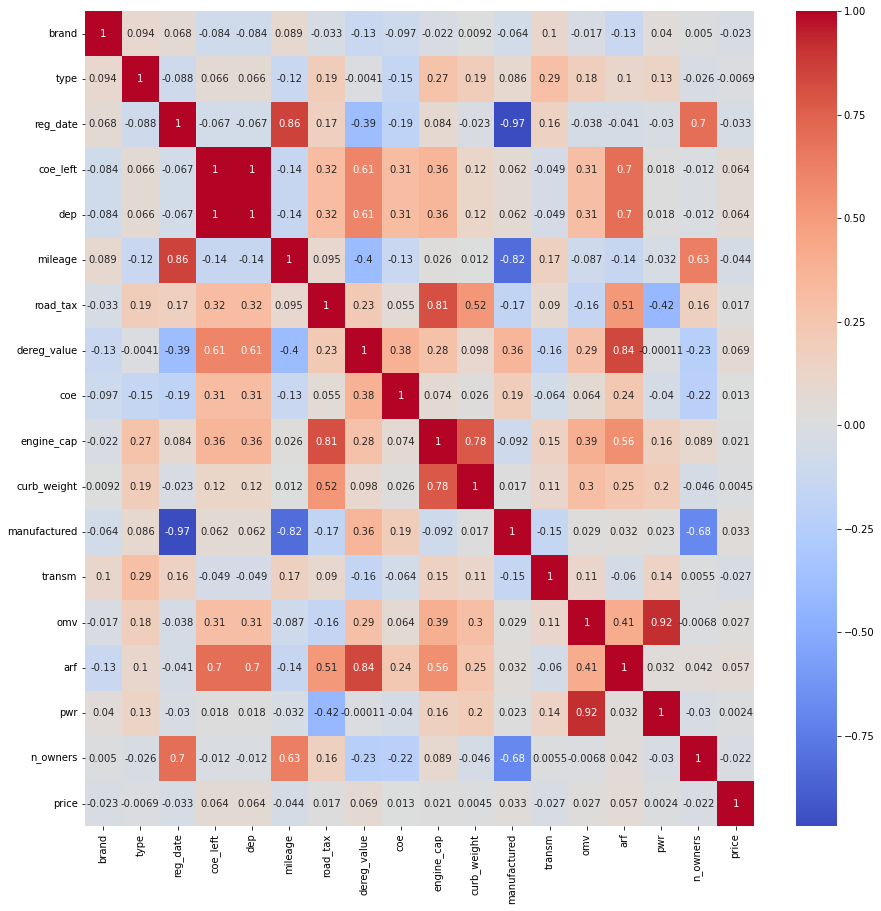

In [80]:
plt.figure(figsize=(15,15))
sns.heatmap(working_data.corr(),annot=True,cmap='coolwarm')

In [153]:
x_work= working_data.iloc[:, 0:-1]
y_work =working_data.iloc[:,-1]
x_work_train,x_work_test,y_work_train,y_work_test=train_test_split(x_work,y_work,test_size=0.2,random_state=42)    

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
f1_isolated = []
regress_model_list=[LinearRegression,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,SVR]
str_regress_list=['LR','RF','DT','KNN','SVR']
mae = []
mse = []
rmse = []
r2= []
for model in regress_model_list :
    model = model()
    model.fit(x_work_train,y_work_train)
    y_pred = model.predict(x_work_test)
    mae.append(metrics.mean_absolute_error(y_work_test,y_pred))
    mse.append(metrics.mean_squared_error(y_work_test,y_pred))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_work_test,y_pred))) # or mse**(0.5)   
    r2.append(metrics.r2_score(y_work_test,y_pred))

In [157]:
r2

[-0.009465856605579415,
 -0.15870287340163358,
 -1.3037910011768772,
 -0.21043597138980963,
 -0.04779763689328975]

In [82]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_rescaled = min_max_scaler.fit_transform(x_work)  

print ("\nAfter min max Scaling : \n", x_rescaled)


After min max Scaling : 
 [[0.13235294 0.2        0.24558991 ... 0.05265727 0.03293809 0.06639278]
 [0.36764706 0.6        0.20472598 ... 0.01138857 0.03237424 0.15875717]
 [0.57352941 0.1        0.2737447  ... 0.02118199 0.03202726 0.25112155]
 ...
 [0.94117647 0.         0.35377991 ... 0.0325892  0.03107305 0.31478955]
 [0.89705882 0.6        0.20835112 ... 0.01604583 0.03257665 0.06639278]
 [0.47058824 0.4        0.26429395 ... 0.01513932 0.03230196 0.06639278]]


In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(x_rescaled)
reduced = pca.transform(x_rescaled)

In [84]:
reduced.shape

(3675, 6)

In [85]:
principal_data = pd.DataFrame(data = reduced
             , columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6'])

In [86]:
reduced_data=pd.concat([principal_data,y_work],axis=1)

<AxesSubplot:>

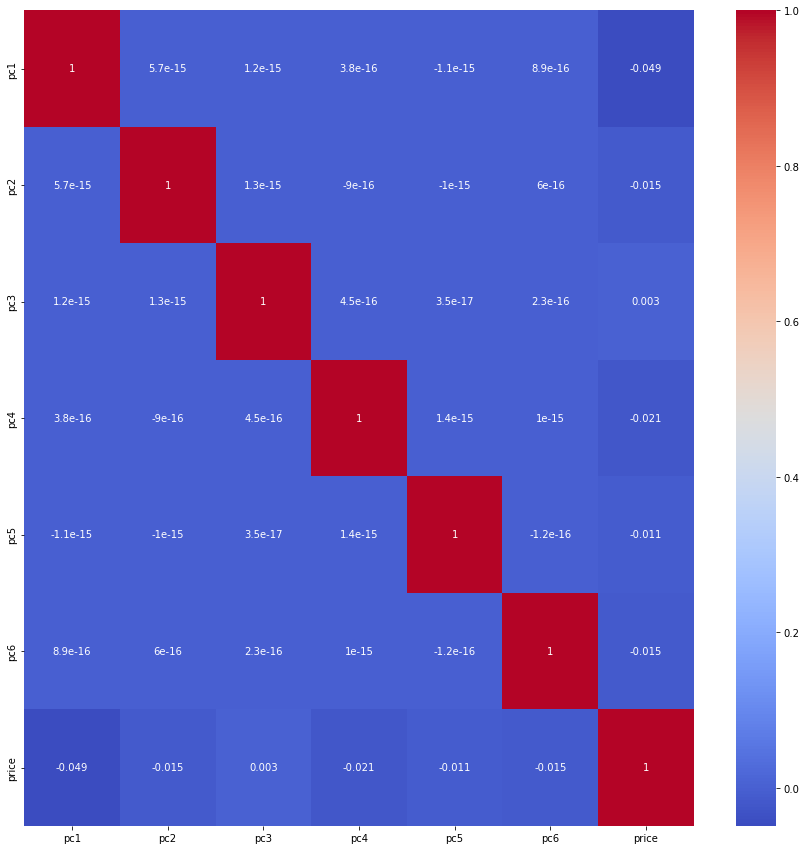

In [87]:
plt.figure(figsize=(15,15))
sns.heatmap(reduced_data.corr(),annot=True,cmap='coolwarm')

In [88]:
x_train_red,x_test_red,y_train_red,y_test_red=train_test_split(principal_data,y_work,test_size=0.2)

In [89]:
from sklearn.ensemble import IsolationForest
iForest = IsolationForest(n_estimators=20, verbose=2)
y_pred = iForest.fit_predict(x_train_red)

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [90]:
y_pred[0:20]

array([ 1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1])

In [91]:
isolation_forest_outliers = np.count_nonzero(y_pred == -1)/np.count_nonzero(y_pred != 5)
# trebuie de facut iloc la valorile din X, nu din train, pentru a putea egala testul
x_train_iforest, y_train_iforest = x_train_red.iloc[(y_pred != -1), :], y_train_red[(y_pred != -1)]

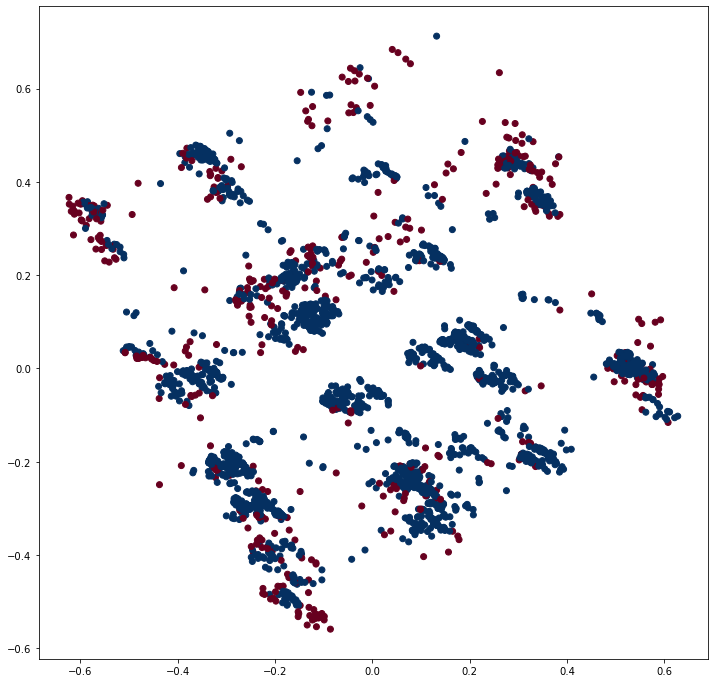

In [92]:
plt.figure(figsize=(12,12))
plt.scatter(x_train_red.iloc[:, 0], x_train_red.iloc[:, 1], c=y_pred, cmap='RdBu')

In [93]:
isolation_forest_outliers

0.16904761904761906

### 16% outliers

In [94]:

mae_isolated = []
mse_isolated = []
rmse_isolated = []
r2_isolated = []
for model in regress_model_list :
    model = model()
    model.fit(x_train_red,y_train_red)
    y_pred = model.predict(x_test_red)
    mae_isolated.append(metrics.mean_absolute_error(y_test_red,y_pred))
    mse_isolated.append(metrics.mean_squared_error(y_test_red,y_pred))
    rmse_isolated.append(np.sqrt(metrics.mean_squared_error(y_test_red,y_pred))) # or mse**(0.5)   
    r2_isolated.append(metrics.r2_score(y_test_red,y_pred))

In [95]:
df_isolated = pd.DataFrame({"Model":str_regress_list,
                  "mae":mae_isolated,
                  "mse":mse_isolated,
                  "rmse":rmse_isolated,
                  "r2":r2_isolated})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


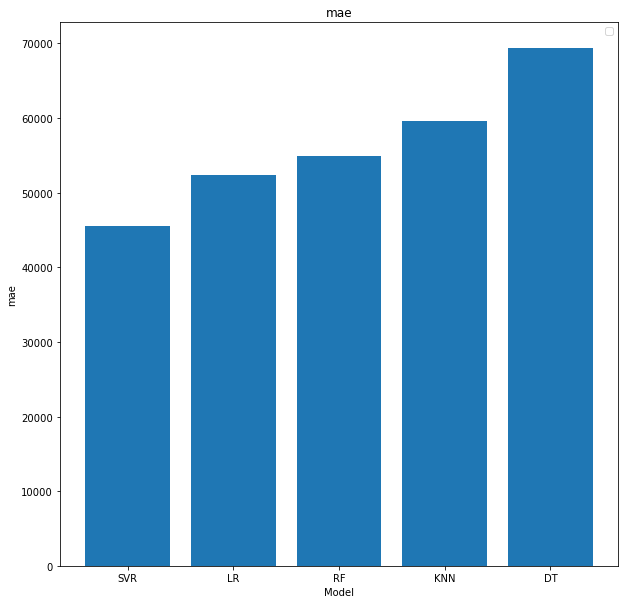

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


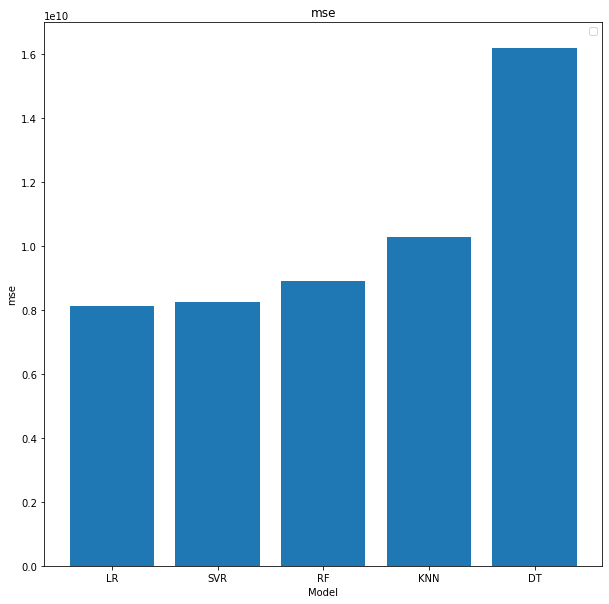

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


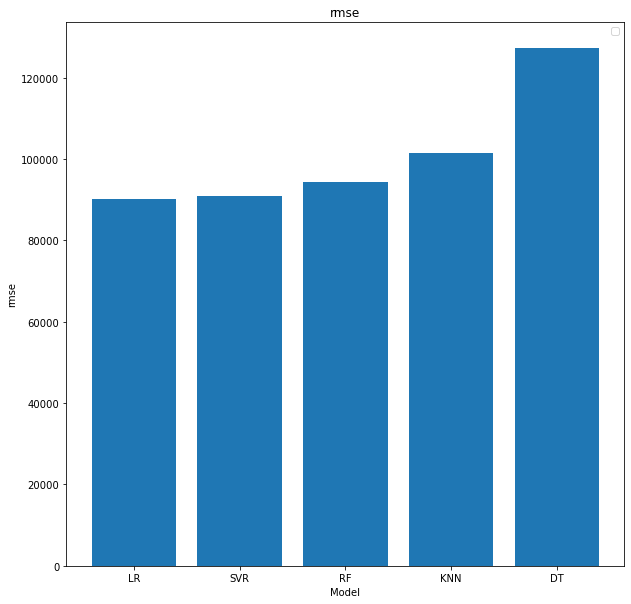

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


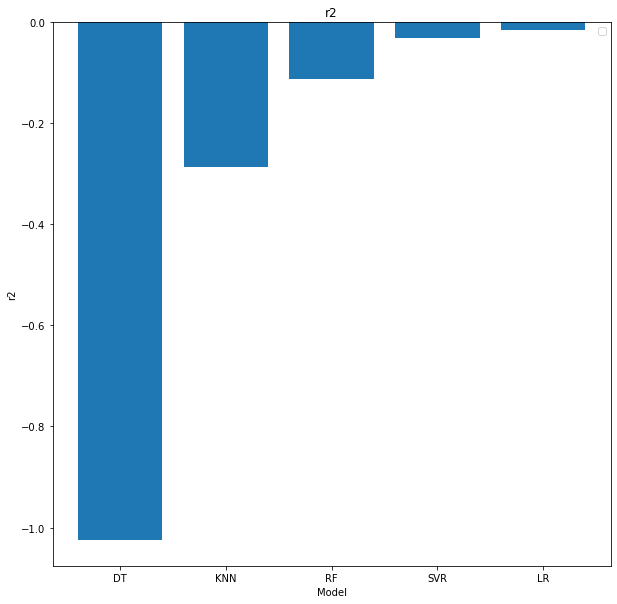

In [96]:
for column in df_isolated.columns[1:]:
    fig = plt.figure(figsize = (10,10)) 
    df_sorted= df_isolated.sort_values(column)
    plt.title(column)
    plt.bar('Model', column,data=df_sorted)
    plt.xlabel("Model")
    plt.ylabel(column)
    plt.legend()
    plt.show()

In [97]:
r2_isolated

[-0.014776684363140502,
 -0.11270011600470742,
 -1.024558320295132,
 -0.2856171903104687,
 -0.03157539917344909]

### cele mai bune rezultate le are lr

In [98]:
# from kydavra import PearsonCorrelationSelector
# pearson = PearsonCorrelationSelector()
# selected_columns = pearson.select(data_isolated,'Legendary')

In [99]:
late_x=late_data.iloc[:,0:-1]
late_y=late_data.iloc[:,-1]

In [100]:
pca = PCA(n_components = 0.94)
late_x_rescaled = min_max_scaler.fit_transform(late_x)  
pca.fit(late_x_rescaled)
late_reduced = pca.transform(late_x_rescaled)

In [101]:
late_reduced.shape

(721, 6)

In [102]:
lr.fit(x_train_red,y_train_red)
#late_y_pred = model.predict(late_reduced)
late_y_pred = lr.predict(late_reduced).astype('int64')


D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [103]:
late_y_pred=pd.DataFrame(data=late_y_pred,columns=['price'])
y_work=pd.DataFrame(data=y_work,columns=['price'])
late_y_pred.head()

,price
0,93556
1,84677
2,79482
3,90954
4,91266


In [104]:
y=pd.concat([y_work,late_y_pred],axis=0)

In [105]:
print(f'{x.shape}\n{y.shape}')

(4396, 17)
(4396, 1)


In [106]:
y.loc[~y['price'].isnull()]

,price
0,54000.0
1,49800.0
2,62800.0
4,12800.0
5,259988.0
...,...
716,83358.0
717,97180.0
718,99927.0
719,89486.0


In [107]:
x = x.reset_index()
y = y.reset_index()
full_data=pd.concat([x,y],join="outer",axis=1)
#full_data=x.append(y)

In [108]:
full_data=full_data.drop('index',axis=1)

In [109]:
full_data.head()

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price
0,9.0,2.0,116.77,15920.000000,15920.000000,99869.099275,1210.0,38133.000000,67304.000000,1997.0,1610.0,2013.0,14.0,41566.0,45193.0,135.0,1.0,54000.0
1,25.0,6.0,87.80,10310.000000,10310.000000,50000.000000,682.0,31237.000000,56001.000000,1496.0,1190.0,2015.0,14.0,19775.0,9775.0,96.0,2.0,49800.0
2,39.0,1.0,136.73,6280.000000,6280.000000,110000.000000,742.0,26794.795778,42487.015553,1598.0,1100.0,2011.0,14.0,18180.0,18180.0,72.0,3.0,62800.0
3,27.0,4.0,168.97,13756.357616,13756.357616,145788.295571,959.0,12531.541892,25727.000000,1591.0,1264.0,2009.0,14.0,10763.0,10763.0,89.0,3.0,12800.0
4,62.0,1.0,182.70,8210.000000,8210.000000,203000.000000,1030.0,6656.000000,21349.000000,1586.0,1060.0,2007.0,16.0,12154.0,13370.0,92.0,2.0,259988.0


<AxesSubplot:>

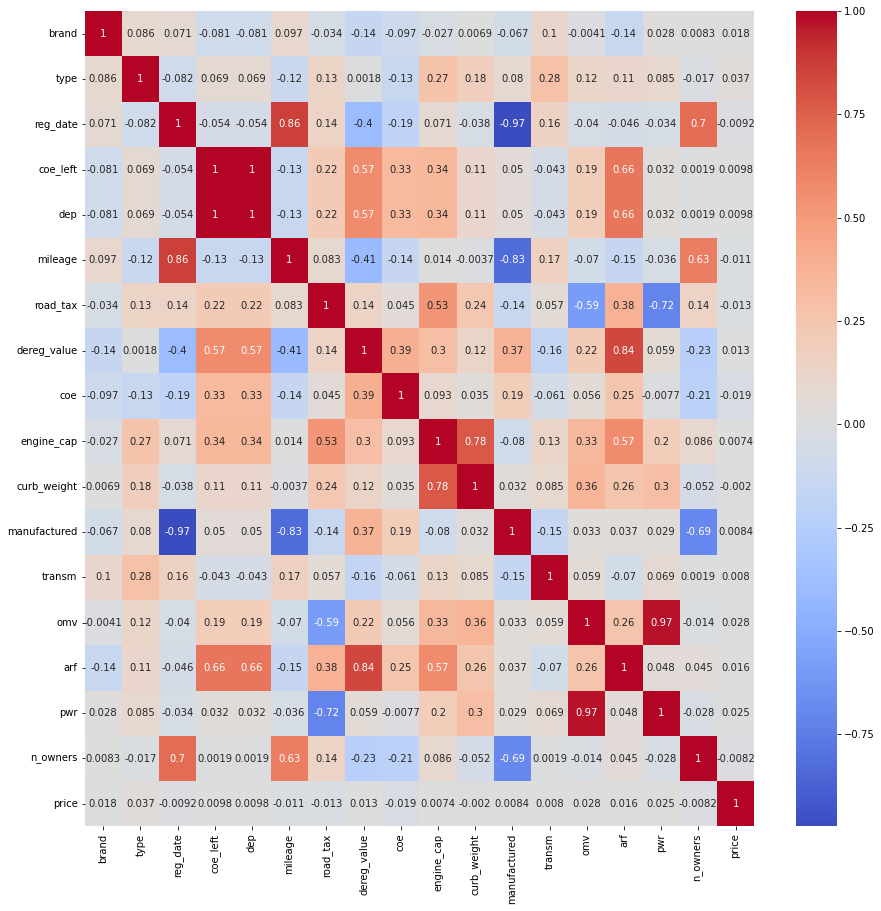

In [110]:
plt.figure(figsize=(15,15))
sns.heatmap(full_data.corr(),annot = True,cmap = 'coolwarm')

In [111]:
x= full_data.iloc[:, 0:-1]
y =full_data.iloc[:,-1]

In [112]:
y=pd.DataFrame(data=y,columns=['price'])

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [114]:
mae_full = []
mse_full = []
rmse_full = []
r2_full = []
for model in regress_model_list :
    model = model()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mae_full.append(metrics.mean_absolute_error(y_test,y_pred))
    mse_full.append(metrics.mean_squared_error(y_test,y_pred))
    rmse_full.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred))) # or mse**(0.5)   
    r2_full.append(metrics.r2_score(y_test,y_pred))

C:\Users\Valerian\AppData\Local\Temp\ipykernel_19708\3394936608.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
df_full = pd.DataFrame({"Model":str_regress_list,
                  "mae":mae_full,
                  "mse":mse_full,
                  "rmse":rmse_full,
                  "r2":r2_full})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


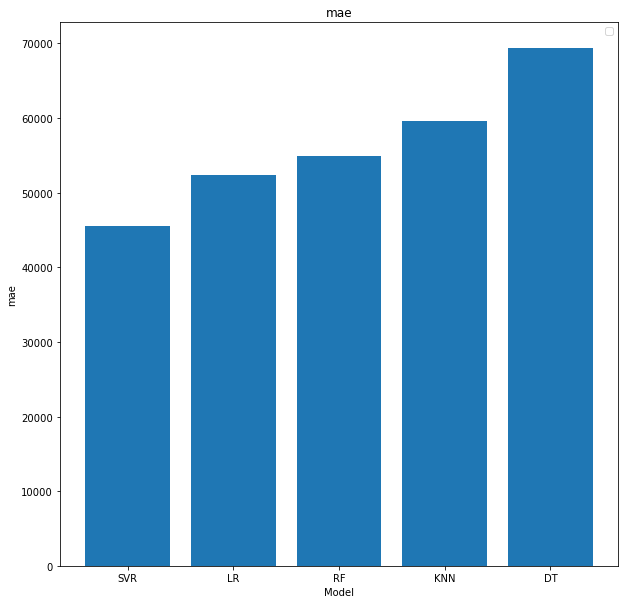

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


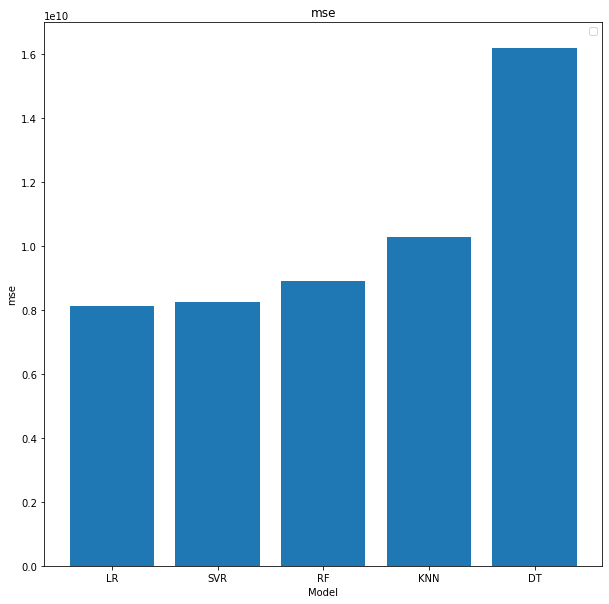

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


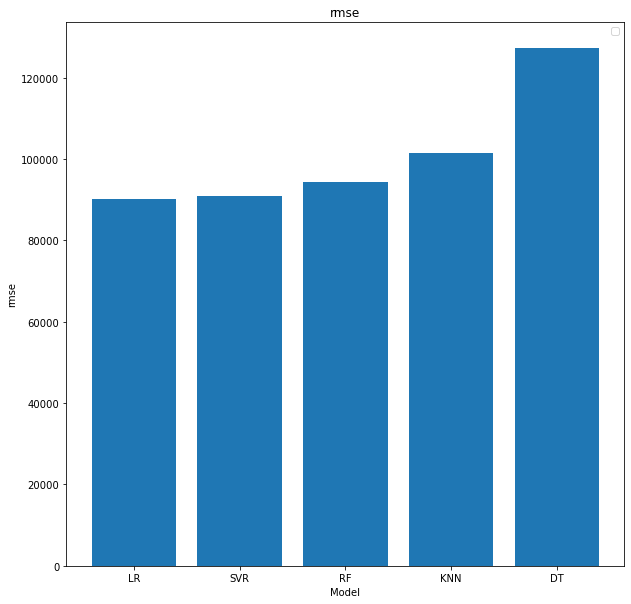

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


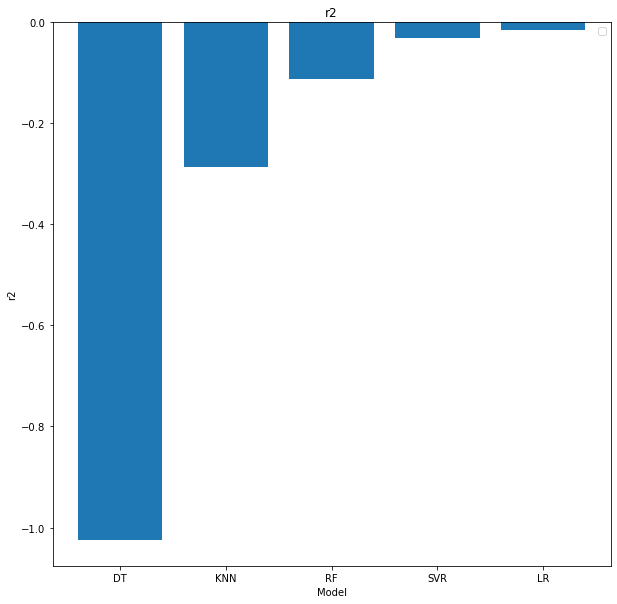

In [116]:
for column in df_full.columns[1:]:
    fig = plt.figure(figsize = (10,10)) 
    df_sorted= df_isolated.sort_values(column)
    plt.title(column)
    plt.bar('Model', column,data=df_sorted)
    plt.xlabel("Model")
    plt.ylabel(column)
    plt.legend()
    plt.show()

In [117]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test) 
accuracy=metrics.r2_score(y_test,y_pred)
print(f'accuracy={accuracy}%')

accuracy=-0.8483489913999056%


In [141]:
pca = PCA(n_components = 0.95)
x_rescaled = min_max_scaler.fit_transform(x)  
pca.fit(x_rescaled)
reduced = pca.transform(x_rescaled)

In [142]:
reduced.shape

(4396, 6)

In [143]:
x_2_reduced=pd.DataFrame(data=reduced,columns=['pca1','pca2','pca3','pca4','pca5','pca6',])
reduced_data_2=pd.concat([x_2_reduced,y],join="outer",axis=1)

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x_2_reduced,y,test_size=0.2,random_state=42)

In [158]:
reduced_data_2.head()

,pca1,pca2,pca3,pca4,pca5,pca6,price
0,0.524924,-0.030093,-0.061499,0.070396,-0.108068,0.066821,54000.0
1,0.143691,0.235433,-0.031647,0.011881,-0.082779,-0.063976,49800.0
2,0.154859,-0.310800,0.091531,-0.005334,-0.006317,-0.020071,62800.0
3,0.183482,0.027933,0.189296,-0.079555,-0.014219,0.030823,12800.0
4,-0.166457,-0.453489,0.134778,-0.090314,-0.028925,0.155022,259988.0


In [164]:

# lr.fit(x_train.reshape(-1, 1), y_train)
# lr.predict([0.52,-0.03,-0.06,0.07,-0.1,0.06])

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [145]:
mae = []
mse = []
rmse = []
r2= []
for model in regress_model_list :
    model = model()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mae.append(metrics.mean_absolute_error(y_test,y_pred))
    mse.append(metrics.mean_squared_error(y_test,y_pred))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred))) # or mse**(0.5)   
    r2.append(metrics.r2_score(y_test,y_pred))

C:\Users\Valerian\AppData\Local\Temp\ipykernel_19708\122742834.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


In [146]:
r2

[-0.00041751833526348925,
 -0.1170664993427386,
 -1.8612603568946136,
 -0.23191069657383334,
 -0.024535023673190492]

In [147]:
y_pred = iForest.fit_predict(x_train)
isolation_forest_outliers = np.count_nonzero(y_pred == -1)/np.count_nonzero(y_pred != 5)
# trebuie de facut iloc la valorile din X, nu din train, pentru a putea egala testul
x_train_iforest, y_train_iforest = x_train.iloc[(y_pred != -1), :], y_train[(y_pred != -1)]
isolation_forest_outliers

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.11803185437997725

In [148]:
x_train.shape

(3516, 6)

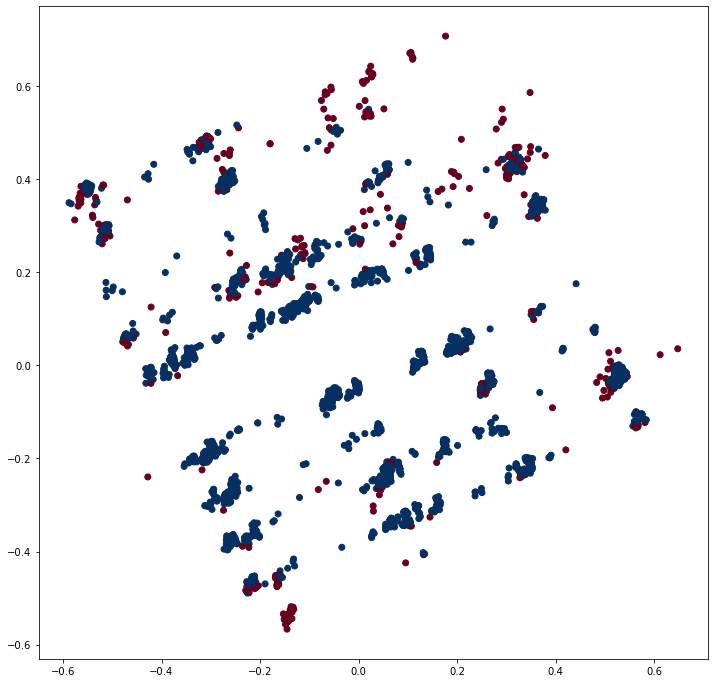

In [149]:
plt.figure(figsize=(12,12))
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_pred, cmap='RdBu')

In [150]:
# lr.fit(x_train_iforest,y_train_iforest)
# y_pred = lr.predict(x_test) 
# accuracy=metrics.r2_score(y_test,y_pred)
# print(f'accuracy={accuracy}%')
mae = []
mse = []
rmse = []
r2= []
for model in regress_model_list :
    model = model()
    model.fit(x_train_iforest,y_train_iforest)
    y_pred = model.predict(x_test)
    mae.append(metrics.mean_absolute_error(y_test,y_pred))
    mse.append(metrics.mean_squared_error(y_test,y_pred))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred))) # or mse**(0.5)   
    r2.append(metrics.r2_score(y_test,y_pred))

C:\Users\Valerian\AppData\Local\Temp\ipykernel_19708\193695414.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_iforest,y_train_iforest)


In [151]:
r2

[-0.0023957954993210073,
 -0.18937575150154173,
 -1.8498207448925048,
 -0.24895727729651185,
 -0.027680436668707342]

In [152]:
reduced_data_2.head()

,pca1,pca2,pca3,pca4,pca5,pca6,price
0,0.524924,-0.030093,-0.061499,0.070396,-0.108068,0.066821,54000.0
1,0.143691,0.235433,-0.031647,0.011881,-0.082779,-0.063976,49800.0
2,0.154859,-0.310800,0.091531,-0.005334,-0.006317,-0.020071,62800.0
3,0.183482,0.027933,0.189296,-0.079555,-0.014219,0.030823,12800.0
4,-0.166457,-0.453489,0.134778,-0.090314,-0.028925,0.155022,259988.0


In [140]:
from kydavra import PearsonCorrelationSelector
pearson = PearsonCorrelationSelector()
selected_columns = pearson.select(reduced_data_2,'price')

In [ ]:
lr.fit(x_train,y_train)
pred = lr.predict([])

In [165]:
data.head()

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price
0,9,2,116.77,15920.0,15920.0,NaN,1210.0,38133.0,67304.0,1997.0,1610.0,2013.0,14,41566.0,45193.0,135.0,1.0,54000.0
1,25,6,87.80,10310.0,10310.0,50000.0,682.0,31237.0,56001.0,1496.0,1190.0,2015.0,14,19775.0,9775.0,96.0,2.0,49800.0
2,39,1,136.73,6280.0,6280.0,110000.0,742.0,NaN,NaN,1598.0,1100.0,2011.0,14,18180.0,18180.0,72.0,3.0,62800.0
3,27,4,168.97,NaN,NaN,NaN,959.0,NaN,25727.0,1591.0,1264.0,2009.0,14,10763.0,10763.0,89.0,3.0,NaN
4,62,1,182.70,8210.0,8210.0,203000.0,1030.0,6656.0,21349.0,1586.0,1060.0,2007.0,16,12154.0,13370.0,92.0,2.0,12800.0


In [166]:
full_data.head()

,brand,type,reg_date,coe_left,dep,mileage,road_tax,dereg_value,coe,engine_cap,curb_weight,manufactured,transm,omv,arf,pwr,n_owners,price
0,9.0,2.0,116.77,15920.000000,15920.000000,99869.099275,1210.0,38133.000000,67304.000000,1997.0,1610.0,2013.0,14.0,41566.0,45193.0,135.0,1.0,54000.0
1,25.0,6.0,87.80,10310.000000,10310.000000,50000.000000,682.0,31237.000000,56001.000000,1496.0,1190.0,2015.0,14.0,19775.0,9775.0,96.0,2.0,49800.0
2,39.0,1.0,136.73,6280.000000,6280.000000,110000.000000,742.0,26794.795778,42487.015553,1598.0,1100.0,2011.0,14.0,18180.0,18180.0,72.0,3.0,62800.0
3,27.0,4.0,168.97,13756.357616,13756.357616,145788.295571,959.0,12531.541892,25727.000000,1591.0,1264.0,2009.0,14.0,10763.0,10763.0,89.0,3.0,12800.0
4,62.0,1.0,182.70,8210.000000,8210.000000,203000.000000,1030.0,6656.000000,21349.000000,1586.0,1060.0,2007.0,16.0,12154.0,13370.0,92.0,2.0,259988.0


In [ ]:
final_data=full_data.drop(['reg_date','coe_left','dep','road_tax'])